This tutorial walks you through submitting a csv of predictions to Kaggle for the first time.<br><br>

__Scoring and challenges__:<br>
If you simply run the code below, your score will be fairly poor. I have intentionally left lots of room for improvement regarding the model used (currently a simple decision tree classifier). <br><br> The idea of this tutorial is to get you started and have you make the decisions of how to improve your score. At the bottom of the tutorial are challenges which, if you follow them, will significantly improve your score.

__Running the code__:<br>
I recommend running the code in Jupyter Notebooks. If you don't know what Jupyter Notebooks is, check out this [tutorial](http://joshlawman.com/getting-set-up-in-jupyter-notebooks-using-anaconda-to-install-the-jupyter-pandas-sklearn-etc/) which can help you install it and start using it.

You can also download this entire page as a notebook from [this folder](https://github.com/jlawman/Meetup/tree/master/11.7%20Meetup%20-%20Decision%20Trees) on my GitHub. 


--- 
### Steps to complete this tutorial:
1. Create a Kaggle account (https://www.kaggle.com/)
2. Download Titanic dataset (https://www.kaggle.com/c/titanic/data)
3. Run every cell in this notebook (except the visualization cells).
4. Submit CSV containing the predictions
5. Try to improve the prediction by using the challenge prompts which are suitable to your level.



### 1. Process the data

#### Load data

In [1]:
#Load data
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Drop features we are not going to use
train = train.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test = test.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

In [2]:
#We have 891 rows of train data
len(train)

891

Our data has the following columns:
- PassengerId - Each passenger's id
- Survived - Whether the passenger survived or not (1 - yes, 0 - no)
- Pclass - The passenger class: (1st class - 1, 2nd class - 2, third class - 3)
- Sex - Each passenger's sex
- Age - Each passenger's age

In [3]:
#Look at the first 3 rows of our training data
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0


#### Prepare the data to be read by our algorithm

In [4]:
#Convert ['male','female'] to [1,0] so that our decision tree can be built
for df in [train,test]:
    df['Sex_binary']=pd.get_dummies(df['Sex'])['male']
    
#Fill in missing age values with 0 (presuming they are a baby if they do not have a listed age)
train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)

In [5]:
#Select feature column names and target variable we are going to use for training
features = ['Pclass','Age','Sex_binary']
target = 'Survived'

#### Look at our prepared data

In [6]:
#This represents the input our decision tree will have. Each row represents a different passenger
train[features].head(3)

,Pclass,Age,Sex_binary
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0


In [7]:
#This represents whether the passenger survived or not. It is the column or tree is trying to learn to predict.
#Each row represents a different passenger (only 3 are displayed)
train[target].head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

### 2. Create and fit the decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier object with feault hyperparameters
clf = DecisionTreeClassifier()  

#This tree is definitely going to overfit our data.
#When you get to the challenge stage, you can return here and tune hyperparameters in this cell.
#For example, try:
#clf = DecisionTreeClassifier(max_depth=3)

In [9]:
#Fit our classifier using the training features and the training target values
clf.fit(train[features],train[target]) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Visualize default tree
This is not a necessary step, but it shows you how complex the tree is when you don't restrict it. 

In [10]:
#Create decision tree ".dot" file
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='titanic_tree.dot',feature_names=features,rounded=True,filled=True,class_names=['Survived','Did not Survive'])

Note, if you want to generate a new tree png, you need to open terminal (or command prompt) after running the cell above. Navigate to the directory where you have this notebook and the type the following command.
>dot -Tpng titanic_tree.dot -o titanic_tree.png<br><br>

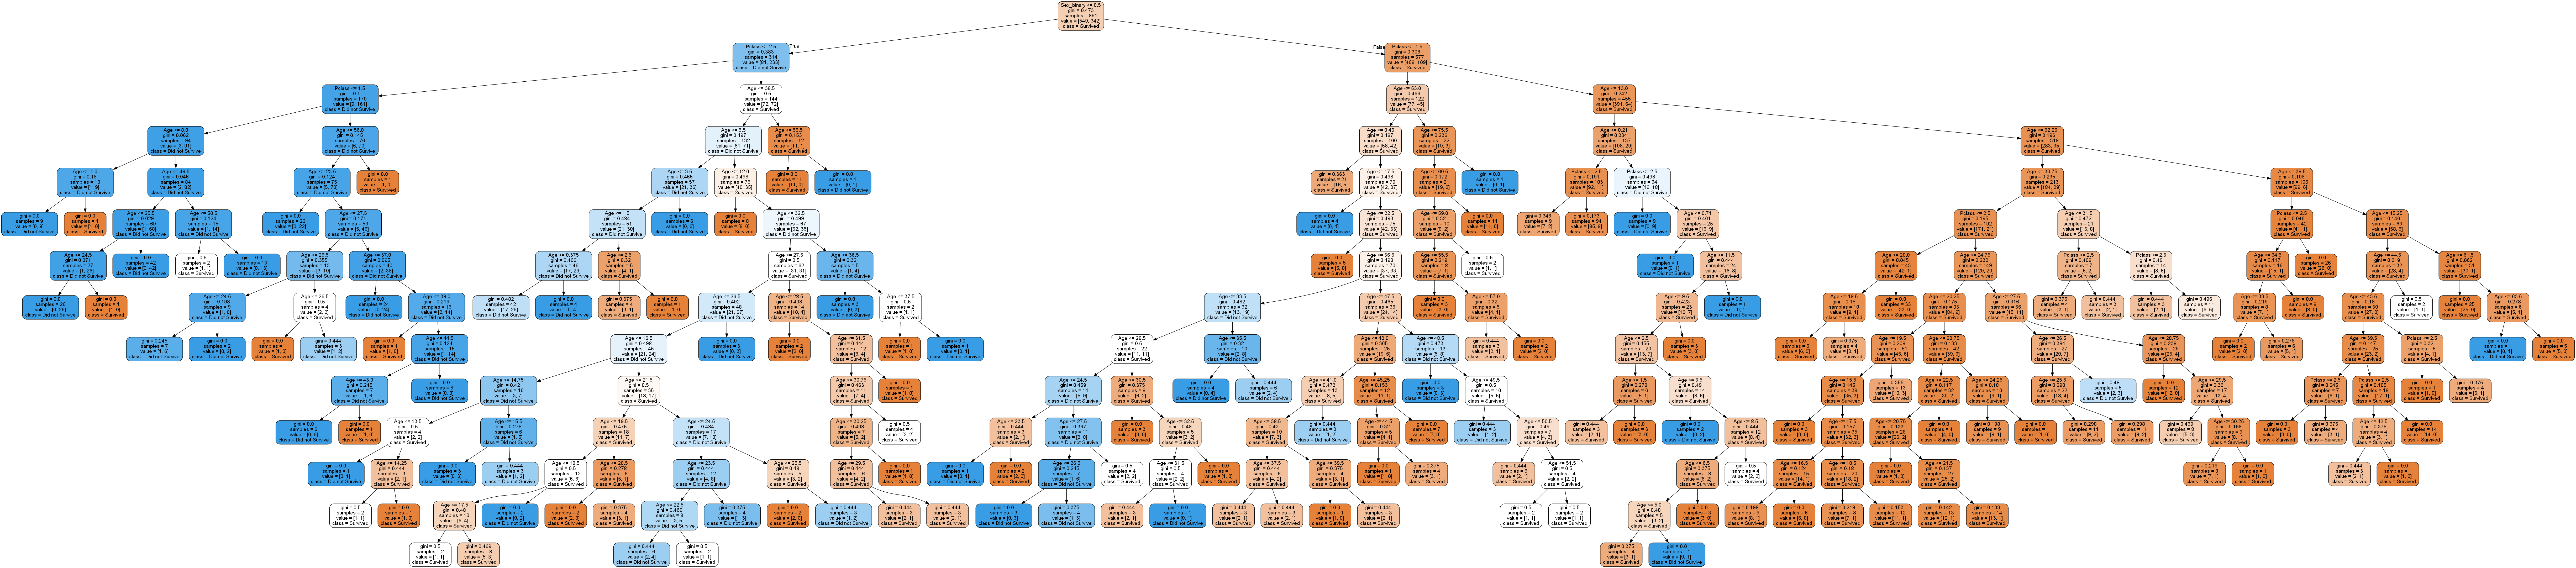

In [11]:
#Display decision tree
from IPython.core.display import Image, display
display(Image('titanic_tree.png', width=1900, unconfined=True))
#Blue on a node or leaf means the tree thinks the person did not survive
#Orange on a node or leaf means that tree thinks that the person did survive

#To zoom in, press control +. To zoom out, press control -. If you are on a Mac, use Command.

### 3. Make Predictions

In [12]:
#Make predictions using the features from the test data set
predictions = clf.predict(test[features])

### 3. Create csv to upload to Kaggle

In [13]:
#Create a dataframe with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [14]:
#Convert to a csv file that can be uploaded
#This is saved in the same directory as your notebook
submission.to_csv('Titanic Predictions.csv',index=False)

### Challenges

#### Pre-challenge steps:<br>
1. Create Kaggle account
2. Download Titanic dataset (from Kaggle)
3. Run every notebook cell.
4. Submit CSV containing the predictions

---
The default decision tree gives a score of .70813 placing you at rank 8,070 out of 8,767. Can you improve it?

#### Level 1: First time on Kaggle
Level 1a: Can you try to give the tree a max depth to improve your score?

Level 1b:  Can you import a different model such as Random Forest Classifier to improve the score? Use the following code line to create it. 
> from sklearn.ensemble import RandomForestClassifier<br>
> clf = RandomForestClassifier() 



#### Level 2: Submitted to Kaggle before
Level 2a: Can you include other features that were dropped to improve your score? Don't forget to deal with the missing data.
<br><br>
Level 2b: Can you visualize your data using matplotlib or seaborn to glean other insights of how to improve your predictions?

#### Level 3: Some familiarity with scikit-learn
Level 3a: Can you use GridSearchCV from sklearn.model_selection on the Random Forest Classifier to tune the hyperparameters and improve your score?
<br><br>
Level 3b: Can you train a list of models and then evaluate each one using sklearn.metrics train_test_split function to see which give you the best score?
<br><br>
Level 3c: Can you take the list from challenge 3b and then have the best models in the list vote on how each prediction should be made? 